In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sklearn
from sklearn.metrics import accuracy_score

In [3]:
import requests
def telegram_bot_sendtext(bot_message):
    
    bot_token = '661544421:AAHuZSMukZmFlhU-npE23CowogP375a0au4'
    bot_chatID = '-225157366'
    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + '&parse_mode=Markdown&text=' + bot_message

    response = requests.get(send_text)

    return response.json()


In [4]:
train_y_origin = (pd.read_csv("./data/train.csv", encoding='big5')['Y1']=="Y")+0

train_x = pd.read_csv("./data/0915_train_pro.csv").drop(columns = 'Unnamed: 0')

test_x = pd.read_csv("./data/0915_test_pro.csv").drop(columns = 'Unnamed: 0')

/home/fio/anaconda3/envs/gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(np.array(test_x))
train_x_norm = norm.transform(np.array(train_x))
train_x_norm = pd.DataFrame(train_x_norm, columns= train_x.columns)
test_x_norm = norm.transform(np.array(test_x))
test_x_norm = pd.DataFrame(test_x_norm, columns= test_x.columns)

In [6]:
#np.array(train_x_norm.max()), np.array(test_x_norm.max())

In [7]:
from imblearn.under_sampling import RandomUnderSampler

RS = RandomUnderSampler(random_state=878)

train_x, train_y = RS.fit_resample(train_x_norm, train_y_origin)
train_x = pd.DataFrame(train_x)
train_x.columns = test_x.columns
train_x.shape

Using TensorFlow backend.
/home/fio/anaconda3/envs/gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fio/anaconda3/envs/gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fio/anaconda3/envs/gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fio/anaconda3/envs/gpu/lib/pytho

(4000, 294)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, random_state = 887)
#x_train, y_train = train_x, train_y

In [9]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=400, tree_method='hist',
                          slient= False, max_depth=50, learning_rate=0.16)

model.fit(x_train, y_train)
print("Train Score is", sklearn.metrics.accuracy_score(model.predict(x_train), y_train))
print("Valid Score is", sklearn.metrics.accuracy_score(model.predict(x_valid), y_valid))

[18:15:59] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
Train Score is 1.0
Valid Score is 0.7058333333333333


In [10]:
import eli5
from eli5.sklearn import PermutationImportance

In [22]:
perm = PermutationImportance(model, random_state=1).fit(x_valid, y_valid)
perm2 = PermutationImportance(model, random_state=1).fit(x_train, y_train)

In [23]:
eli5.show_weights(perm, feature_names = x_valid.columns.to_list())

Weight,Feature
0.0330 ± 0.0083,INSD_LAST_YEARDIF_CNT
0.0128 ± 0.0131,AGE_高
0.0108 ± 0.0107,TOOL_VISIT_1YEAR_CNT
0.0058 ± 0.0043,LEVEL
0.0058 ± 0.0056,OUTPATIENT_SURGERY_AMT
0.0050 ± 0.0030,CHARGE_CITY_CD_B1
0.0048 ± 0.0055,INSD_CNT
0.0043 ± 0.0031,INSD_1ST_AGE_中
0.0043 ± 0.0051,IF_ADD_Q_IND_N
0.0043 ± 0.0090,AG_NOW_CNT


In [24]:
eli5.show_weights(perm2, feature_names = x_valid.columns.to_list())

Weight,Feature
0.0483 ± 0.0047,INSD_LAST_YEARDIF_CNT
0.0174 ± 0.0037,AGE_高
0.0121 ± 0.0020,TOOL_VISIT_1YEAR_CNT
0.0050 ± 0.0026,AGE_中
0.0017 ± 0.0012,ANNUAL_INCOME_AMT
0.0016 ± 0.0014,BMI
0.0016 ± 0.0007,APC_1ST_YEARDIF
0.0009 ± 0.0007,DIEACCIDENT_AMT
0.0009 ± 0.0003,ANNUITY_AMT
0.0005 ± 0.0006,AG_NOW_CNT


In [11]:
x_valid.INSD_LAST_YEARDIF_CNT

1425    0.342105
335     0.105263
1452    0.131579
1400    0.210526
95      0.105263
          ...   
1363    0.052632
1440    0.000000
298     0.289474
3873    0.000000
1942    0.000000
Name: INSD_LAST_YEARDIF_CNT, Length: 1200, dtype: float64

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model_tree = DecisionTreeClassifier(random_state=0, max_depth=1, min_samples_split=5).fit(x_train, y_train)

In [14]:
accuracy_score(model_tree.predict(x_valid), y_valid)

0.6683333333333333

In [15]:
accuracy_score(model_tree.predict(x_valid), model.predict(x_valid))

0.7341666666666666

In [16]:
accuracy_score(model_tree.predict(x_train), y_train)

0.6725

In [17]:
 unique, counts = np.unique(model_tree.predict(x_valid), return_counts=True)
result_dict = dict(zip(unique, counts))
print(result_dict)

{0: 589, 1: 611}


In [18]:
import graphviz

In [19]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(model_tree, out_file=None, feature_names=x_train.columns.to_list())


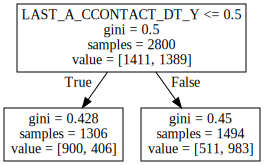

In [20]:
graphviz.Source(tree_graph)

In [21]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [22]:
feature_names = x_train.columns.to_list()


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


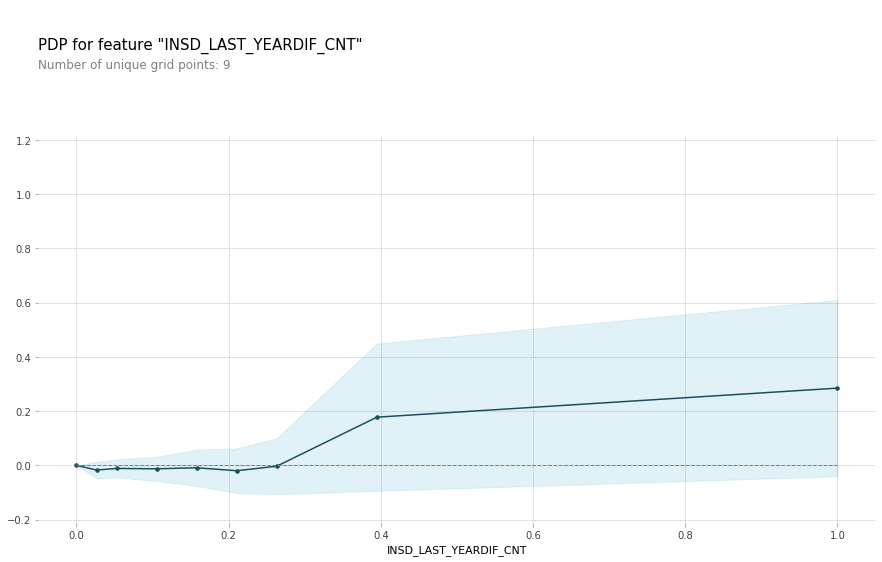

In [23]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model, dataset=x_valid, model_features=feature_names, feature='INSD_LAST_YEARDIF_CNT')

# plot it
pdp.pdp_plot(pdp_goals, 'INSD_LAST_YEARDIF_CNT')
plt.show()

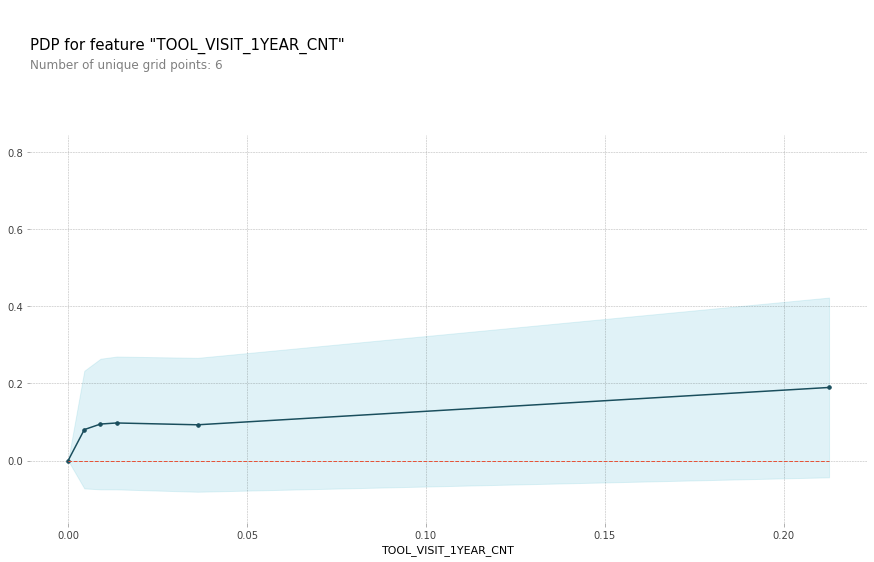

In [24]:
feature_to_plot = 'TOOL_VISIT_1YEAR_CNT'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_valid, model_features=feature_names, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

In [25]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['INSD_LAST_YEARDIF_CNT', 'TOOL_VISIT_1YEAR_CNT']
inter1  =  pdp.pdp_interact(model=model, dataset=x_valid, model_features=feature_names, features=features_to_plot)



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


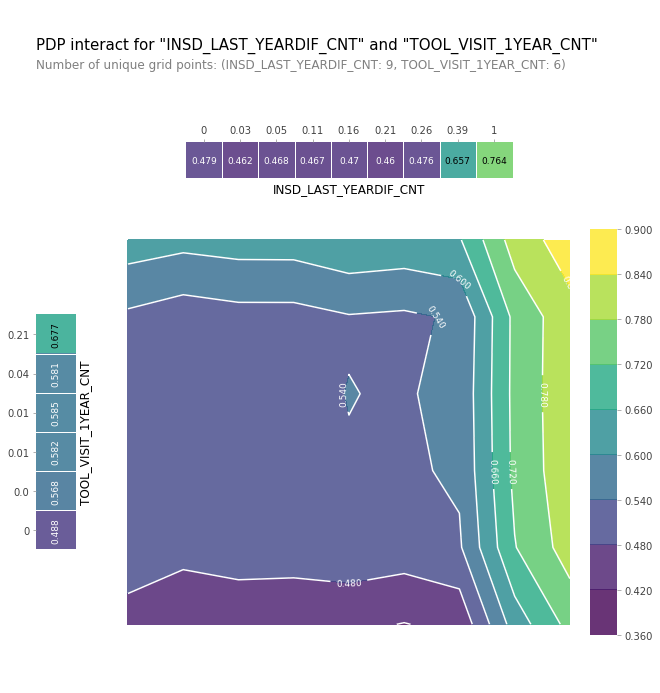

In [26]:
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour', plot_pdp=True)
plt.show()